## Module 2 - Classification

##### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

C:\Users\nithi\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('merged.csv', index_col = [0])

In [3]:
df

,FlightDate,Quarter,Year,Month,Origin,Dest,DayofMonth,DepTime,DepDel15,CRSDepTime,...,pressure,cloudcover,DewPointF,WindGustKmph,tempF,WindChillF,humidity,date,time,airport_code
0,2016-01-01,1,2016,1,SEA,JFK,1,741.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
1,2016-01-01,1,2016,1,SEA,SFO,1,759.0,1.0,724,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
2,2016-01-01,1,2016,1,SEA,LAX,1,705.0,0.0,705,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
3,2016-01-01,1,2016,1,SEA,IAH,1,740.0,0.0,738,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
4,2016-01-01,1,2016,1,SEA,ATL,1,742.0,0.0,745,...,1030,0,23,8,34,29,66,2016-01-01,700,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840269,2017-09-23,3,2017,9,JFK,LAX,23,2146.0,0.0,2143,...,1017,0,68,15,86,86,55,2017-09-23,2100,JFK
1840270,2017-09-24,3,2017,9,MCO,LAX,24,2008.0,0.0,2016,...,1012,14,71,19,82,82,71,2017-09-24,2000,MCO
1840271,2017-09-24,3,2017,9,MCO,JFK,24,1948.0,0.0,1954,...,1012,14,71,19,82,82,71,2017-09-24,2000,MCO
1840272,2017-09-24,3,2017,9,MCO,EWR,24,2224.0,1.0,2140,...,1012,0,72,18,81,81,75,2017-09-24,2100,MCO


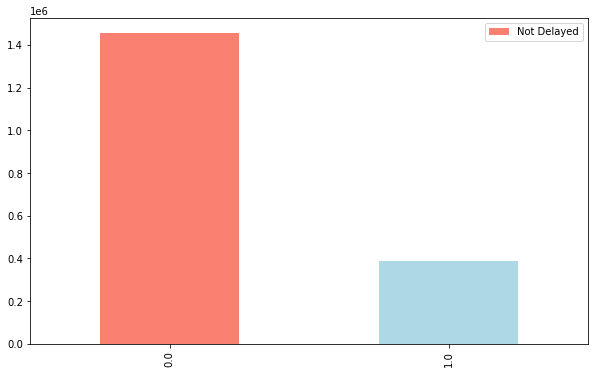

In [4]:
plt.figure(figsize = (10, 6))
df['ArrDel15'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.legend(['Not Delayed', 'Delayed']);

##### Class Imbalance
The class imbalance present can affect the performance of the classification models. This can lead to a bias in favor of the majority class, resulting in lower recall for the **Delayed Flights (1.0 - Minority Class)**.

In [5]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

##### A little data analysis

C:\Users\nithi\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nithi\anaconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Delay Probability by Origin')

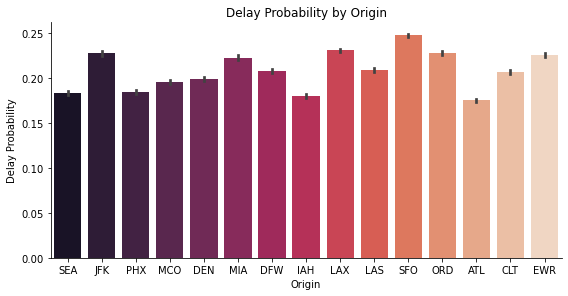

In [6]:
sns.factorplot(x = 'Origin', y = 'ArrDel15', data = df, kind = 'bar', size = 4, aspect = 2, palette = 'rocket')
plt.ylabel('Delay Probability')
plt.title('Delay Probability by Origin')

C:\Users\nithi\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nithi\anaconda\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Delay Probability by Destination')

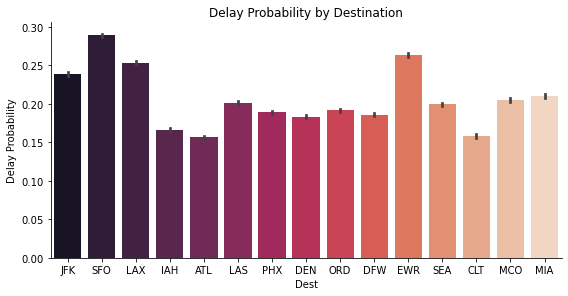

In [7]:
sns.factorplot(x = 'Dest', y = 'ArrDel15', data = df, kind = 'bar', size = 4, aspect = 2, palette = 'rocket')
plt.ylabel('Delay Probability')
plt.title('Delay Probability by Destination')

In [8]:
df.columns

Index(['FlightDate', 'Quarter', 'Year', 'Month', 'Origin', 'Dest',
       'DayofMonth', 'DepTime', 'DepDel15', 'CRSDepTime', 'DepDelayMinutes',
       'OriginAirportID', 'DestAirportID', 'ArrTime', 'CRSArrTime', 'ArrDel15',
       'ArrDelayMinutes', 'rounded_time', 'windspeedKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'WindGustKmph', 'tempF', 'WindChillF', 'humidity', 'date',
       'time', 'airport_code'],
      dtype='object')

<AxesSubplot:>

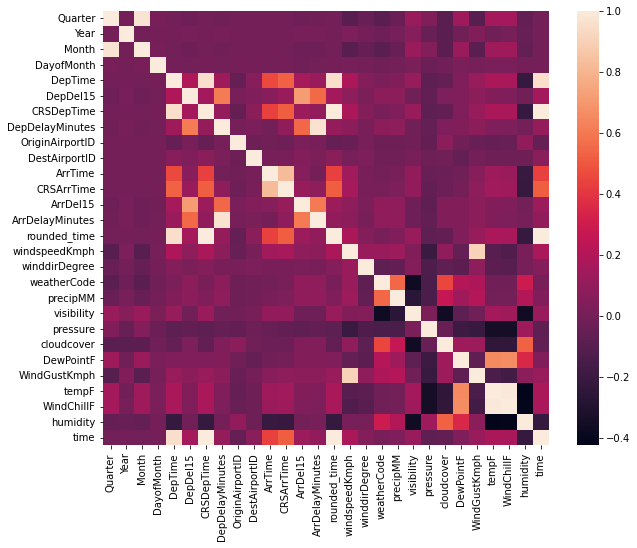

In [9]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.corr(), ax = ax)

##### Deleting Redundant Information
"OriginAirport ID" and "DestAirportID" can be dropped from the dataset since they contain redundant information already present in the "Origin" and "Dest". Additionally, there is both "Quarter" and "Month" columns, but we only need one of them. Either of these columns can serve the purpose. Furthermore, there are columns named "CRSArrTime," "ArrTime," and "ArrDelayMinutes" that hold information about flight delays, which should be dropped.

In [10]:
df = df.drop(columns = ['airport_code','rounded_time','date','FlightDate','OriginAirportID', 'DestAirportID','WindChillF', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'time', 'Quarter'])

In [11]:
df.columns

Index(['Year', 'Month', 'Origin', 'Dest', 'DayofMonth', 'DepTime', 'DepDel15',
       'CRSDepTime', 'DepDelayMinutes', 'ArrDel15', 'windspeedKmph',
       'winddirDegree', 'weatherCode', 'precipMM', 'visibility', 'pressure',
       'cloudcover', 'DewPointF', 'WindGustKmph', 'tempF', 'humidity'],
      dtype='object')

##### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Origin"] = labelEncoder.fit_transform(df["Origin"])
df["Dest"] = labelEncoder.fit_transform(df["Dest"])

In [13]:
X = df.drop('ArrDel15', axis = 1)
y = df['ArrDel15']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 3000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.921410  0.977319  0.948541  436581.000000
1.0            0.888755  0.684915  0.773633  115502.000000
accuracy       0.916145  0.916145  0.916145       0.916145
macro avg      0.905082  0.831117  0.861087  552083.000000
weighted avg   0.914578  0.916145  0.911948  552083.000000


##### Logistic Regression Result Analysis

The low recall score observed for **Delayed flights (Class : 1.0)** is because of the class imbalance that is present. It still indicates a reasonable ability to identify delayed flights. 
While the model achieves an accuracy score of **~91.6**, the recall score for **Class 1.0** can be improved with resampling techniques. 

In [16]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
dtree_acc = round(accuracy_score(y_test, dtreepred),2)

report = classification_report(y_test, dtreepred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[397523  39058]
 [ 34013  81489]]
87.0
              precision    recall  f1-score        support
0.0            0.921182  0.910537  0.915828  436581.000000
1.0            0.675994  0.705520  0.690441  115502.000000
accuracy       0.867645  0.867645  0.867645       0.867645
macro avg      0.798588  0.808028  0.803135  552083.000000
weighted avg   0.869885  0.867645  0.868675  552083.000000


In [17]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
nb_acc = round(accuracy_score(y_test, gaussiannbpred),2)

report = classification_report(y_test, gaussiannbpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[407213  29368]
 [ 27441  88061]]
90.0
              precision    recall  f1-score        support
0.0            0.936867  0.932732  0.934795  436581.000000
1.0            0.749908  0.762420  0.756112  115502.000000
accuracy       0.897101  0.897101  0.897101       0.897101
macro avg      0.843388  0.847576  0.845454  552083.000000
weighted avg   0.897753  0.897101  0.897412  552083.000000


In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[427471   9110]
 [ 35363  80139]]
92.0
              precision    recall  f1-score        support
0.0            0.923595  0.979133  0.950553  436581.000000
1.0            0.897926  0.693832  0.782795  115502.000000
accuracy       0.919445  0.919445  0.919445       0.919445
macro avg      0.910760  0.836483  0.866674  552083.000000
weighted avg   0.918224  0.919445  0.915456  552083.000000


In [19]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[425346  11235]
 [ 34727  80775]]
92.0
              precision    recall  f1-score        support
0.0            0.924519  0.974266  0.948741  436581.000000
1.0            0.877894  0.699339  0.778509  115502.000000
accuracy       0.916748  0.916748  0.916748       0.916748
macro avg      0.901206  0.836802  0.863625  552083.000000
weighted avg   0.914764  0.916748  0.913126  552083.000000


In [20]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Gausian NB', 'XGBoost'],
                'Score': [rfc_acc, dtree_acc, nb_acc, xgb_acc]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest Classifier,0.92
3,XGBoost,0.92
2,Gausian NB,0.90
1,Decision Tree Classifier,0.87


##### Analysis of the results
A common trend among the results of the models is a **low recall score** for the **Delayed Class (1.0)**. This can be improved by resampling techniques.

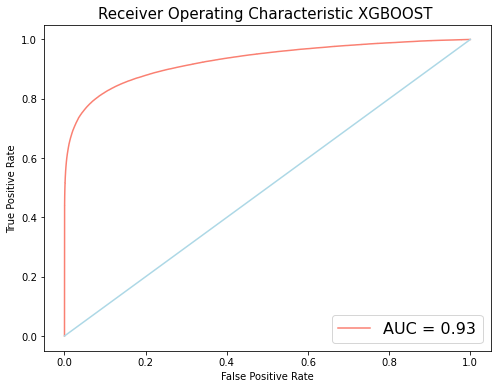

In [21]:
# XGBOOST ROC/AUC (Best Model)
from sklearn import metrics
fig, ax  = plt.subplots(figsize = (8, 6))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax.plot(fprxgb, tprxgb, label = 'AUC = %0.2f' % roc_aucxgb, color = 'salmon')
ax.plot([0, 1], [0, 1], color = 'lightblue')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize = 15)
ax.set_ylabel('True Positive Rate', fontsize = 10)
ax.set_xlabel('False Positive Rate', fontsize = 10)
ax.legend(loc = 'lower right', prop = {'size': 16});

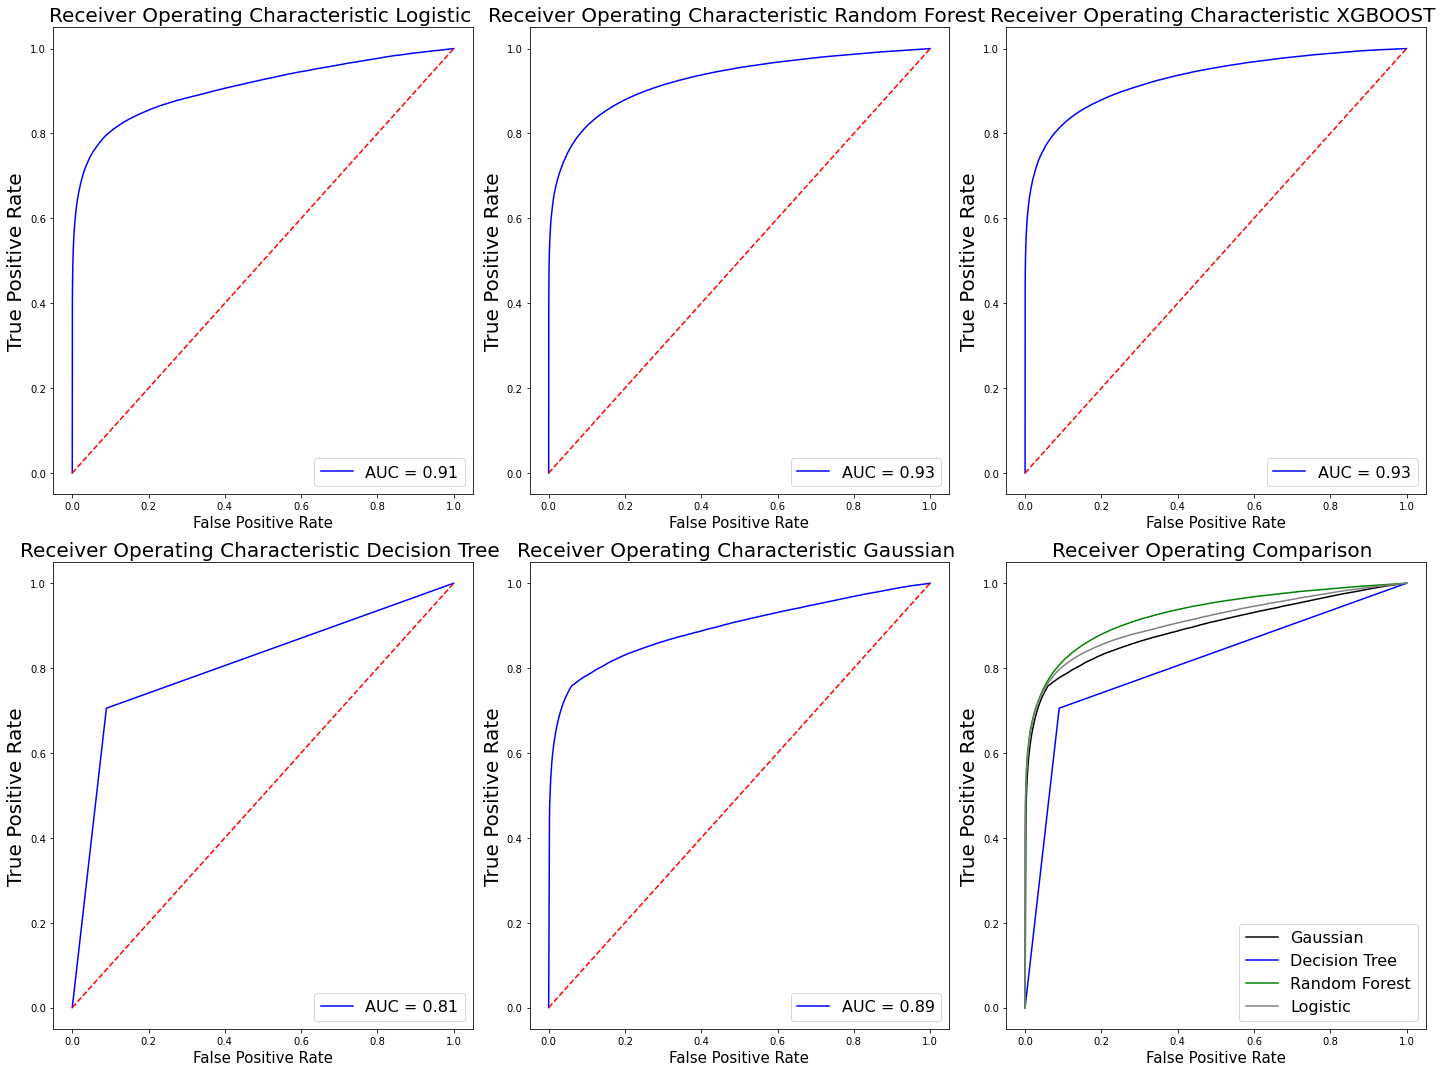

In [22]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LogisticRegression
probs = log_reg.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize = 20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize = 15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RandomForest
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#XGBoost
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic XGBOOST ',fontsize = 20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize = 20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16});

#DTree
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#NaiveBayes
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#CombinedPLot
ax_arr[1,2].plot(fprgau, tprgau,  label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree,  label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprrfc, tprrfc,  label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog,  label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

##### Resampling

In [23]:
#Raw Over and Under Sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

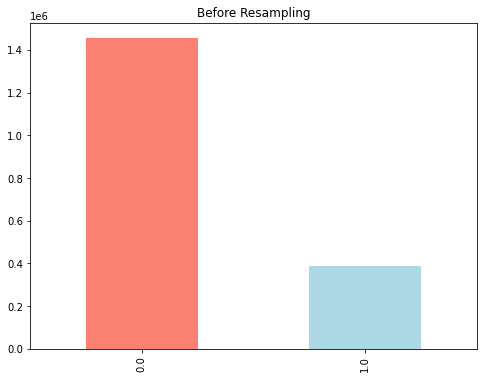

In [24]:
plt.figure(figsize = (8, 6))
y.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('Before Resampling');

##### Raw Over Sampling

In [25]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

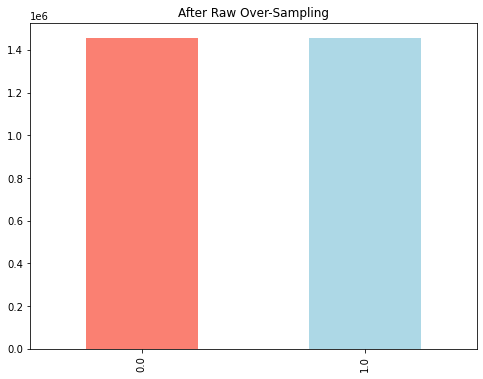

In [26]:
plt.figure(figsize = (8, 6))
y_resampled.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('After Raw Over-Sampling');

In [27]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909110 entries, 0 to 2909109
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Month            int64  
 2   Origin           int32  
 3   Dest             int32  
 4   DayofMonth       int64  
 5   DepTime          float64
 6   DepDel15         float64
 7   CRSDepTime       int64  
 8   DepDelayMinutes  float64
 9   windspeedKmph    int64  
 10  winddirDegree    int64  
 11  weatherCode      int64  
 12  precipMM         float64
 13  visibility       int64  
 14  pressure         int64  
 15  cloudcover       int64  
 16  DewPointF        int64  
 17  WindGustKmph     int64  
 18  tempF            int64  
 19  humidity         int64  
dtypes: float64(4), int32(2), int64(14)
memory usage: 421.7 MB


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [29]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 3000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.806781  0.927318  0.862861  436204.000000
1.0            0.914627  0.778079  0.840845  436529.000000
accuracy       0.852671  0.852671  0.852671       0.852671
macro avg      0.860704  0.852699  0.851853  872733.000000
weighted avg   0.860724  0.852671  0.851849  872733.000000


##### Logisitic Regression Result Analysis after Over Sampling
An increased recall for the **Delayed Class** indicates that the model is capturing a higher proportion of the actual positive instances (Class "1.0") compared to before. This suggests improved sensitivity in identifying positive instances. However a **dip in the accuracy can also be observed**. The drop in accuracy is possibly due to the trade-off between precision and recall. The increase in recall of one class often comes comes at the cost of precision, which can impact overall accuracy. 

In [30]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[413765  22439]
 [  7648 428881]]
97.0
              precision    recall  f1-score        support
0.0            0.981852  0.948558  0.964918  436204.000000
1.0            0.950281  0.982480  0.966112  436529.000000
accuracy       0.965526  0.965526  0.965526       0.965526
macro avg      0.966066  0.965519  0.965515  872733.000000
weighted avg   0.966061  0.965526  0.965515  872733.000000


In [31]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[402226  33978]
 [ 85809 350720]]
86.0
              precision    recall  f1-score        support
0.0            0.824174  0.922105  0.870394  436204.000000
1.0            0.911676  0.803429  0.854137  436529.000000
accuracy       0.862745  0.862745  0.862745       0.862745
macro avg      0.867925  0.862767  0.862265  872733.000000
weighted avg   0.867942  0.862745  0.862262  872733.000000


In [32]:
gaussiannb = GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
nb_acc = round(accuracy_score(y_test, gaussiannbpred),2)

report = classification_report(y_test, gaussiannbpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[404802  31402]
 [102954 333575]]
85.0
              precision    recall  f1-score        support
0.0            0.797237  0.928011  0.857668  436204.000000
1.0            0.913962  0.764153  0.832371  436529.000000
accuracy       0.846051  0.846051  0.846051       0.846051
macro avg      0.855599  0.846082  0.845019  872733.000000
weighted avg   0.855621  0.846051  0.845014  872733.000000


In [33]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
dtree_acc = round(accuracy_score(y_test, dtreepred),2)

report = classification_report(y_test, dtreepred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[390831  45373]
 [  8544 427985]]
94.0
              precision    recall  f1-score        support
0.0            0.978607  0.895982  0.935473  436204.000000
1.0            0.904147  0.980427  0.940743  436529.000000
accuracy       0.938221  0.938221  0.938221       0.938221
macro avg      0.941377  0.938205  0.938108  872733.000000
weighted avg   0.941363  0.938221  0.938109  872733.000000


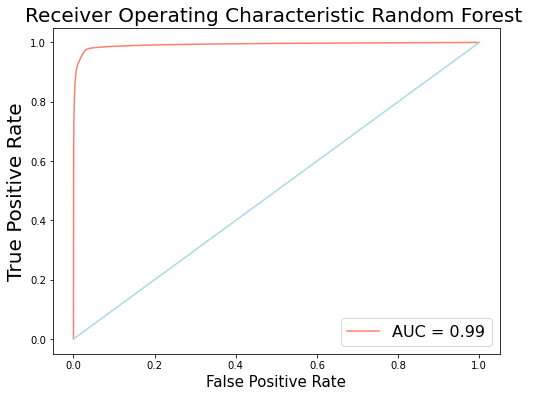

In [34]:
# RandomForest AUC (Best Model)
fig, ax  = plt.subplots(figsize = (8, 6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, label = 'AUC = %0.2f' % roc_aucrfc, color = 'salmon')
ax.plot([0, 1], [0, 1], color = 'lightblue')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

##### Random Forest Classifier Result Analysis after Over Sampling
An accuracy of **97%** is achieved with the random forest classifier, with **good recall values** for both the classes. Random Forest Classifiers are **less prone to over-fitting**  because of the randomness introduced in both sampling and selection of features.

##### Raw Under-Sampling

In [35]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

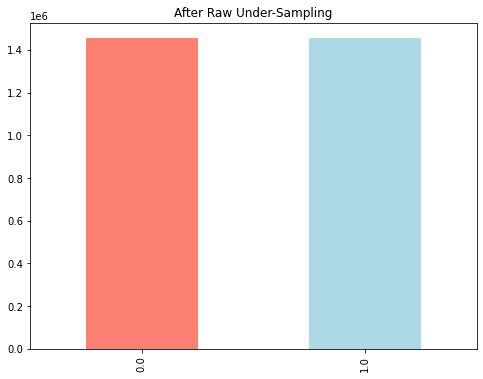

In [36]:
plt.figure(figsize = (8, 6))
y_resampled.value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue'])
plt.title('After Raw Under-Sampling');

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)

In [38]:
log_reg = LogisticRegression(solver='lbfgs', max_iter = 3000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

              precision    recall  f1-score        support
0.0            0.807027  0.927050  0.862885  436447.000000
1.0            0.914268  0.778246  0.840791  436286.000000
accuracy       0.852662  0.852662  0.852662       0.852662
macro avg      0.860648  0.852648  0.851838  872733.000000
weighted avg   0.860638  0.852662  0.851840  872733.000000


In [39]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
rfc_acc = round(accuracy_score(y_test, rfcpred),2)

report = classification_report(y_test, rfcpred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[413839  22608]
 [  7488 428798]]
97.0
              precision    recall  f1-score        support
0.0            0.982228  0.948200  0.964914  436447.000000
1.0            0.949916  0.982837  0.966096  436286.000000
accuracy       0.965515  0.965515  0.965515       0.965515
macro avg      0.966072  0.965518  0.965505  872733.000000
weighted avg   0.966075  0.965515  0.965505  872733.000000


In [40]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
xgb_acc = round(accuracy_score(y_test, xgbprd),2)

report = classification_report(y_test, xgbprd, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)
del report, report_df

[[402404  34043]
 [ 85551 350735]]
86.0
              precision    recall  f1-score        support
0.0            0.824674  0.922000  0.870626  436447.000000
1.0            0.911526  0.803911  0.854343  436286.000000
accuracy       0.862966  0.862966  0.862966       0.862966
macro avg      0.868100  0.862955  0.862484  872733.000000
weighted avg   0.868092  0.862966  0.862486  872733.000000


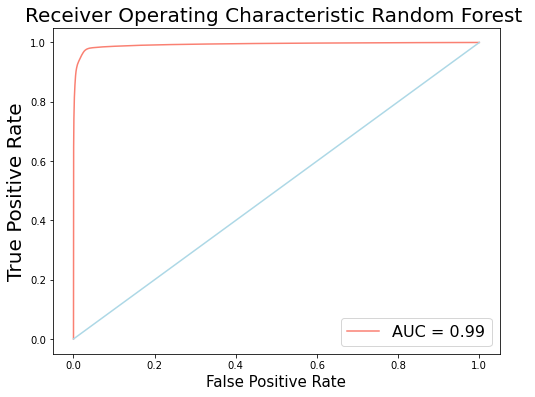

In [41]:
# RandomForest AUC (Best Model)
fig, ax  = plt.subplots(figsize = (8, 6))
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, label = 'AUC = %0.2f' % roc_aucrfc, color = 'salmon')
ax.plot([0, 1], [0, 1], color = 'lightblue')
ax.set_title('Receiver Operating Characteristic Random Forest ',fontsize=20)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

##### Classification Results
The **Random Forest Classifier's** ensemble nature combined with under and oversampling mitigated biases and learned class patterns effectively, leading to **accurate predictions, strong recall for both classes, and robust performance in addressing class imbalance.** Other models experience a dip in accuracy after being trained on under or oversampled data, it could be due to overfitting.

In [42]:
import pickle as pkl

In [43]:
pkl.dump(rfc, open('rfc.pkl', 'wb'))